In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
import squidpy as sq
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/'
anndata_objects = []
name_anndata = "A1-1"+"/"+"anndataNucA11"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "A1-2"+"/"+"anndataNucA12"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "C2"+"/"+"anndataNucC2"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "D2-1"+"/"+"anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
name_anndata = "PS"+"/"+"ps_slice"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all_0threshold')
anndata_objects.append(anndata)
samples = ["A1-1", "A1-2", "C2", "D2-1", "PS"]

In [3]:
anndata = anndata_objects[0]
annotation1 = 'annotation_score_genes_original_BasicMartin_12'
annotation2 = 'annotation_own_score_genes_BasicMartin_12'
# get proportions of anndata.obs[annotation1]
print(anndata.obs[annotation1].value_counts(normalize=True)*100)
print(anndata.obs[annotation2].value_counts(normalize=True)*100)

Hepa            69.449614
LSEC            10.573429
Kupf             5.273420
Stel             4.520074
Portal vein      2.632279
Chol             2.313215
B cell           1.488966
Fibr             1.364885
Oth im           1.329434
Portal LAM       0.584951
Central vein     0.345653
Meso             0.124080
Name: annotation_score_genes_original_BasicMartin_12, dtype: float64
Hepa            62.297261
LSEC            10.901356
Kupf             5.840645
Stel             5.627936
Portal vein      2.738633
Chol             2.587964
Oth im           2.135957
B cell           1.976425
Fibr             1.657361
Unknown          1.639635
Meso             0.912878
Central vein     0.850838
Portal LAM       0.833112
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64


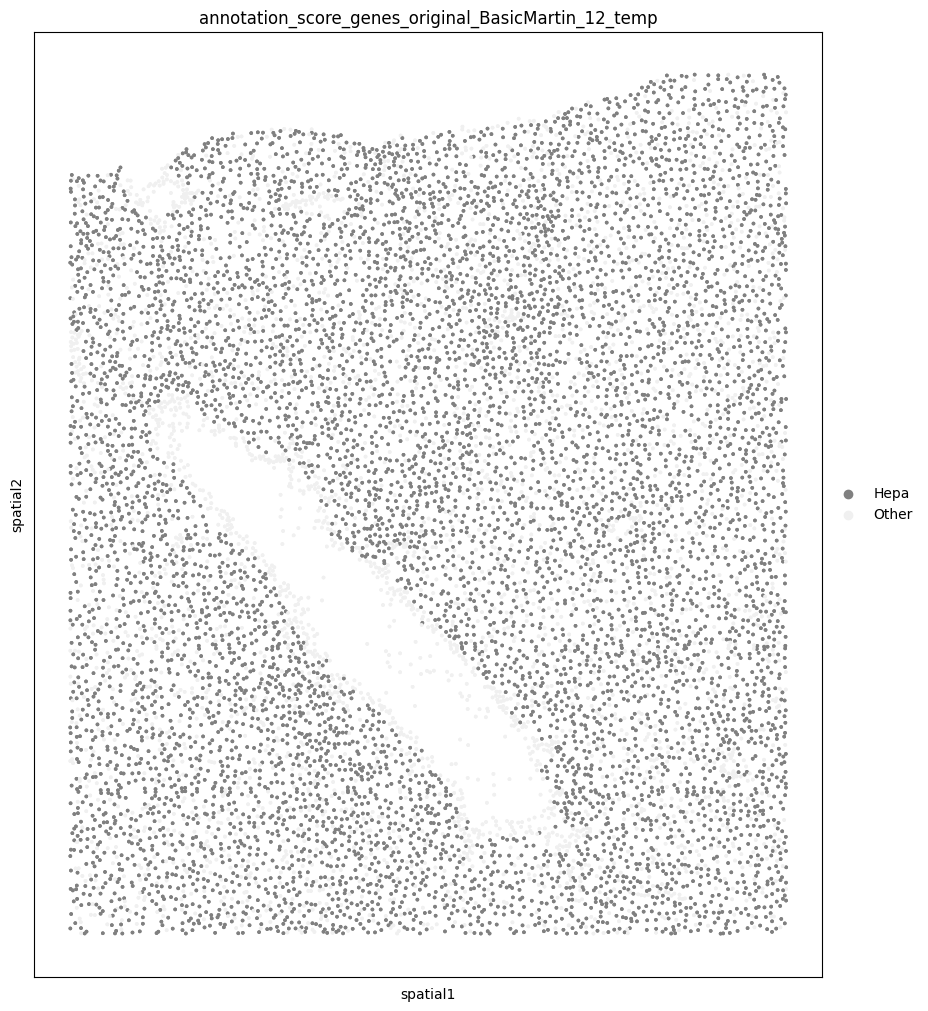

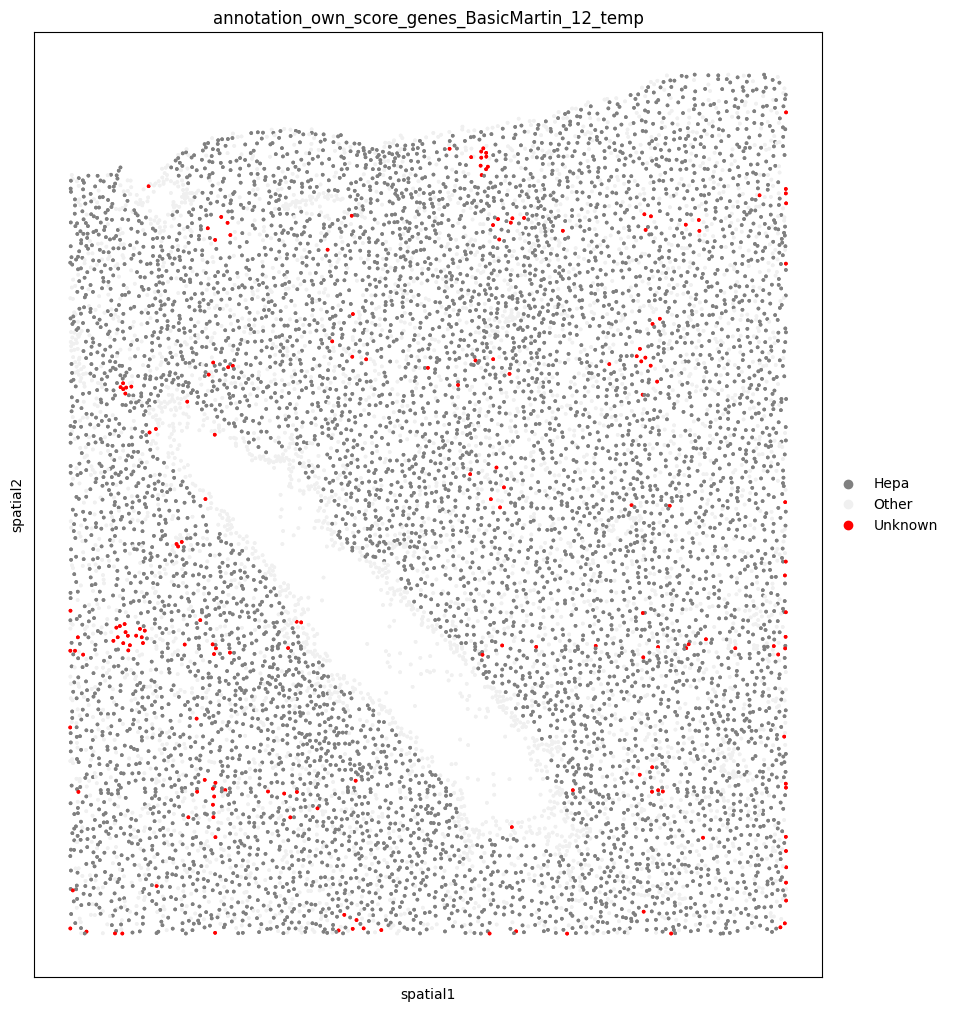

In [5]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Unknown' or x == 'Hepa' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Unknown' or x == 'Hepa' else 'Other')
anndata.uns[annotation2+'_temp_colors'] = ['#808080','#F0F0F0','#FF0000']
anndata.uns[annotation1+'_temp_colors'] = ['#808080','#F0F0F0']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10)) 

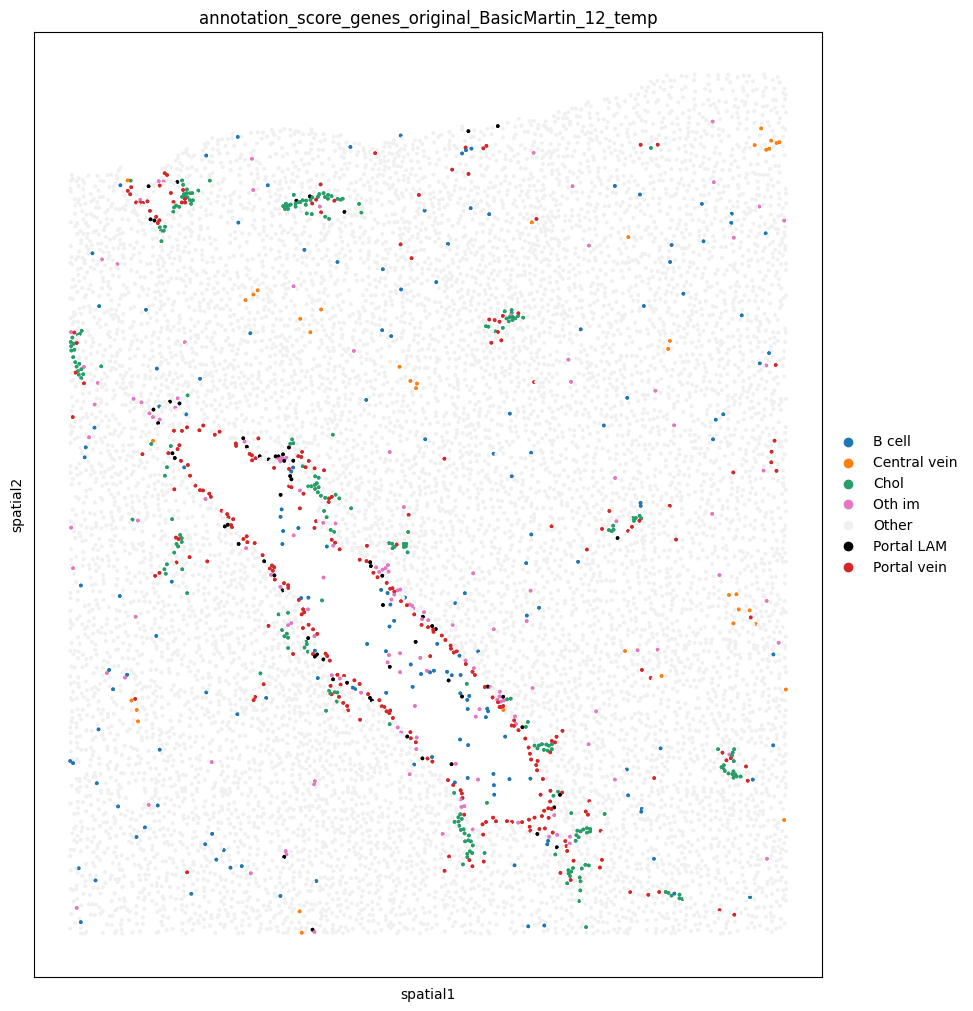

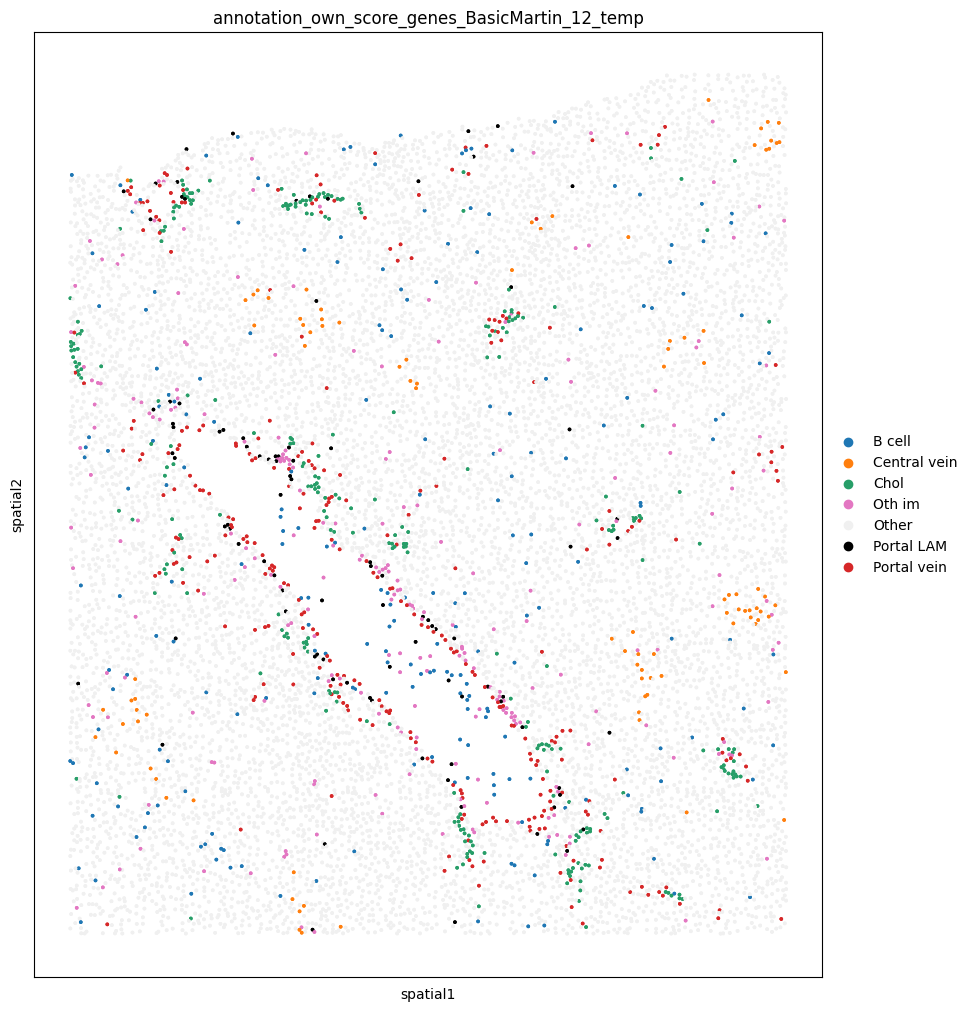

In [6]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' or x == 'Chol' or x == 'B cell' or x == 'Portal LAM' or x == 'Oth im' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'Central vein' or x == 'Portal vein' or x == 'Chol' or x == 'B cell' or x == 'Portal LAM' or x == 'Oth im' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#1f77b4', '#ff7f0e', '#279e68','#e377c2','#F0F0F0', '#000000','#d62728']
anndata.uns[annotation2+'_temp_colors'] = ['#1f77b4', '#ff7f0e', '#279e68','#e377c2','#F0F0F0', '#000000','#d62728']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))

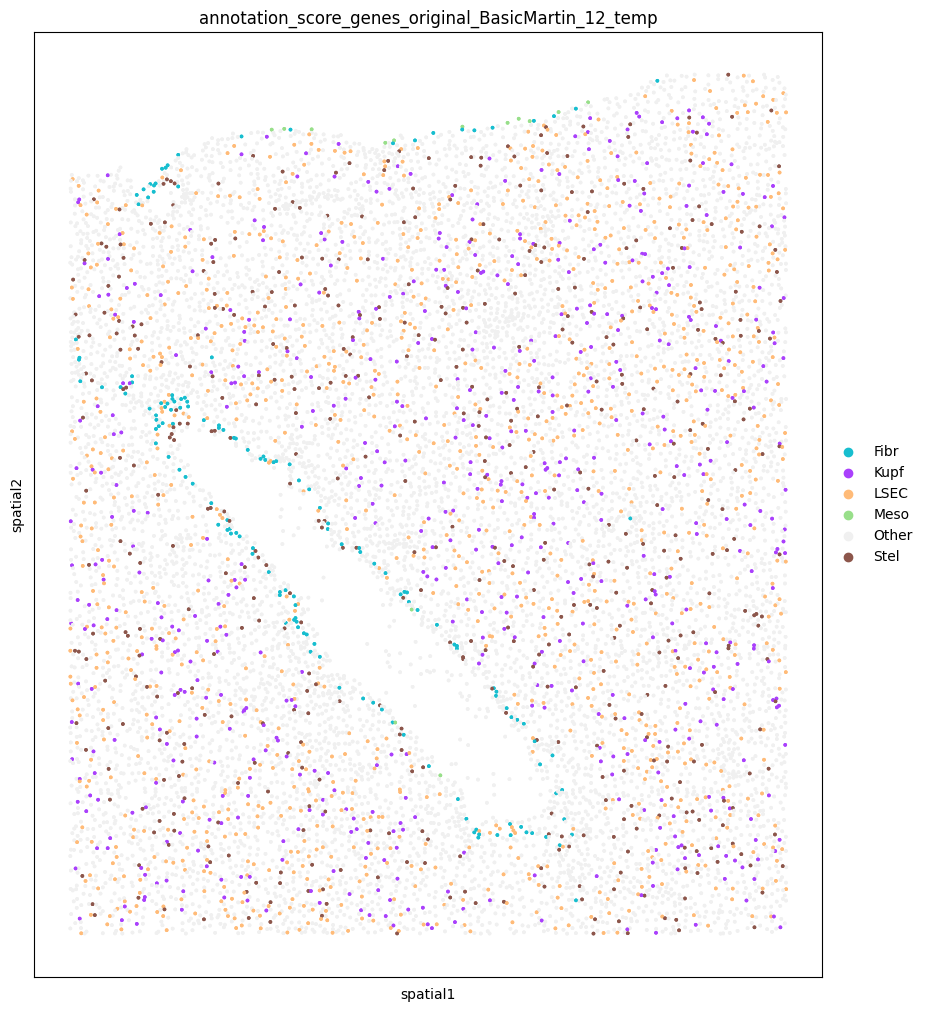

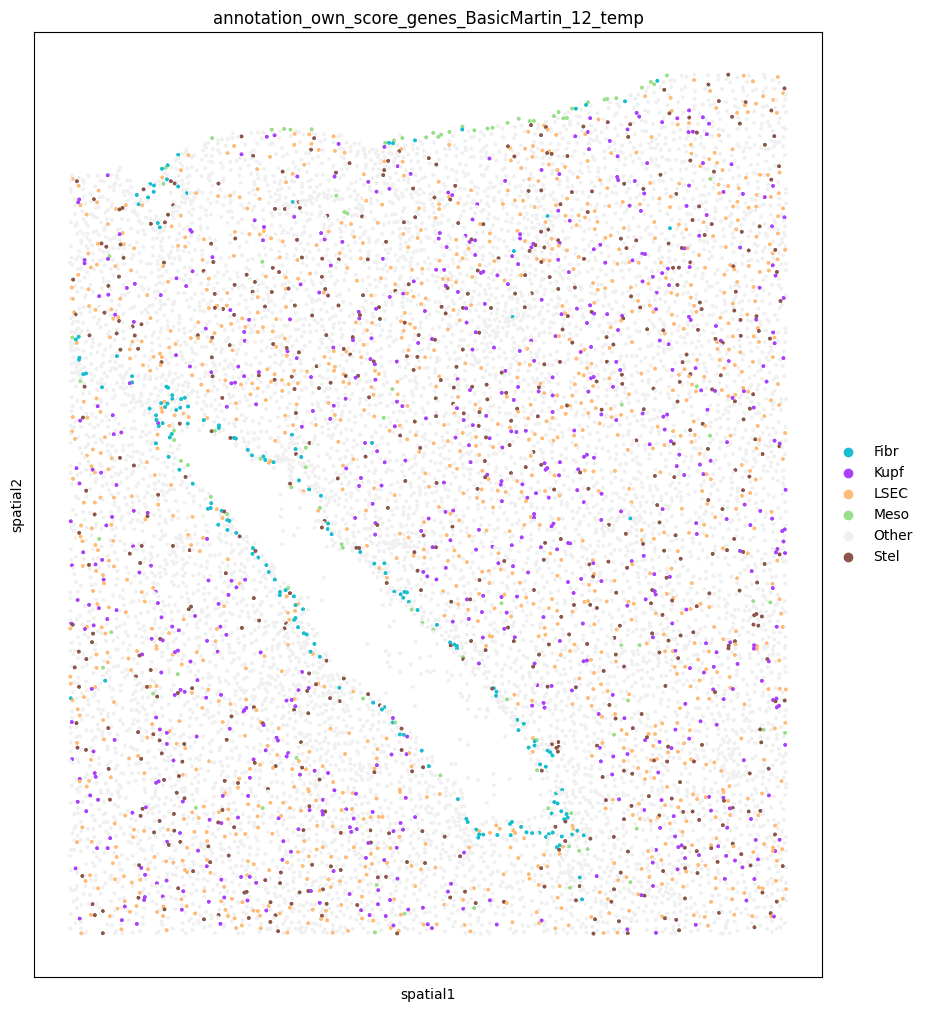

In [7]:
anndata = anndata_objects[0]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1]
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2]
anndata.obs[annotation1+'_temp'] = anndata.obs[annotation1+'_temp'].apply(lambda x: x if x == 'LSEC' or x == 'Kupf' or x == 'Fibr' or x == 'Meso' or x == 'Stel' else 'Other')
anndata.obs[annotation2+'_temp'] = anndata.obs[annotation2+'_temp'].apply(lambda x: x if x == 'LSEC' or x == 'Kupf' or x == 'Fibr' or x == 'Meso' or x == 'Stel' else 'Other')
anndata.uns[annotation1+'_temp_colors'] = ['#17becf', '#aa40fc', '#ffbb78', '#98df8a','#F0F0F0','#8c564b']
anndata.uns[annotation2+'_temp_colors'] = ['#17becf', '#aa40fc', '#ffbb78', '#98df8a','#F0F0F0','#8c564b']
sq.pl.spatial_scatter(anndata,color=annotation1+'_temp',shape=None, figsize=(10, 10)) 
sq.pl.spatial_scatter(anndata,color=annotation2+'_temp',shape=None, figsize=(10, 10))

True     89.630417
False    10.369583
Name: annotation_own_score_genes_BasicMartin_12, dtype: float64


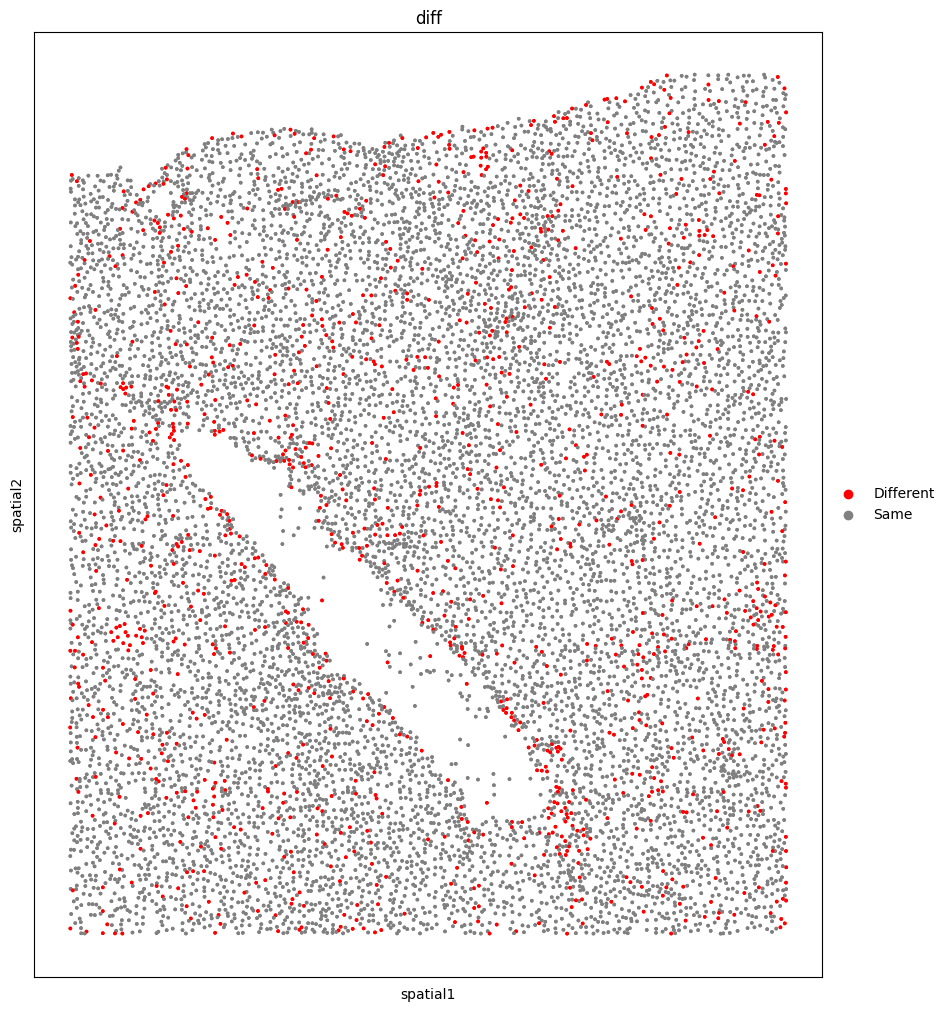

In [8]:
anndata = anndata_objects[0]
l1 = anndata.obs[annotation1].to_list()
l2 = anndata.obs[annotation2]
# Compare 
diff = l1 == l2
# count the number of True and False
print(100*diff.value_counts()/len(diff))
# set False to 'Different' and True to 'Same'
diff = diff.apply(lambda x: 'Different' if x == False else 'Same')
anndata.obs['diff'] = diff
anndata.uns['diff'+'_colors'] = ['#FF0000','#808080']
sq.pl.spatial_scatter(anndata,color='diff',shape=None, figsize=(10, 10)) 

In [15]:
changing_cell_types(anndata,annotation1,annotation2,cut_off=0.1)

[[('Hepa', 'Stel'), 1.55],
 [('Hepa', 'LSEC'), 1.21],
 [('Hepa', 'Unknown'), 1.2],
 [('Hepa', 'Oth im'), 0.59],
 [('Hepa', 'Chol'), 0.51],
 [('Hepa', 'Kupf'), 0.46],
 [('Hepa', 'Meso'), 0.46],
 [('Hepa', 'Portal vein'), 0.4],
 [('Hepa', 'B cell'), 0.36],
 [('LSEC', 'Central vein'), 0.27],
 [('Hepa', 'Fibr'), 0.2],
 [('Stel', 'Fibr'), 0.2],
 [('Hepa', 'Central vein'), 0.19],
 [('LSEC', 'Portal vein'), 0.18],
 [('Hepa', 'Portal LAM'), 0.15],
 [('LSEC', 'Unknown'), 0.15],
 [('Portal vein', 'Fibr'), 0.12],
 [('Stel', 'Unknown'), 0.12],
 [('LSEC', 'Kupf'), 0.12],
 [('Fibr', 'Meso'), 0.11],
 [('Portal vein', 'Meso'), 0.1],
 [('LSEC', 'Hepa'), 0.1]]

In [10]:
anno1_co_ocs = []
anno2_co_ocs = []
diff_co_ocs = []

A1-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
A1-2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
C2


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']
D2-1


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Meso']
PS


  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1000 [00:00<?, ?/s]

['Unknown']


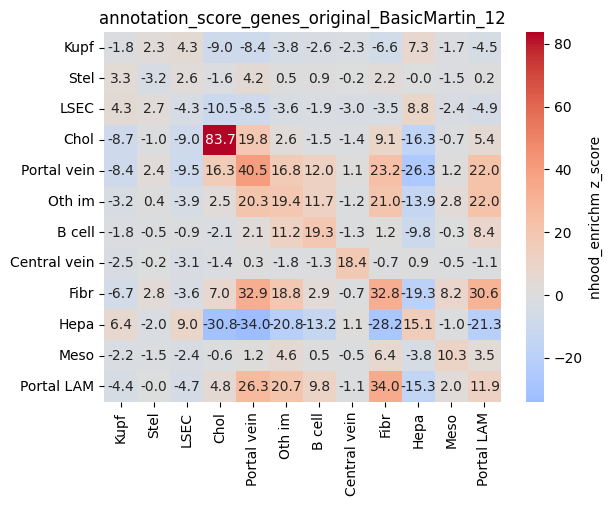

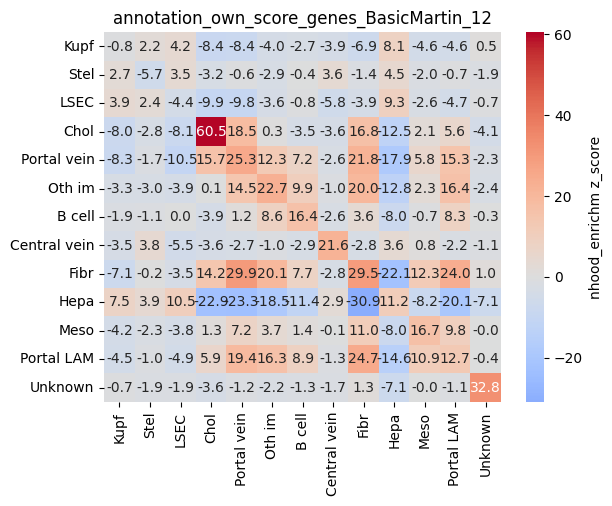

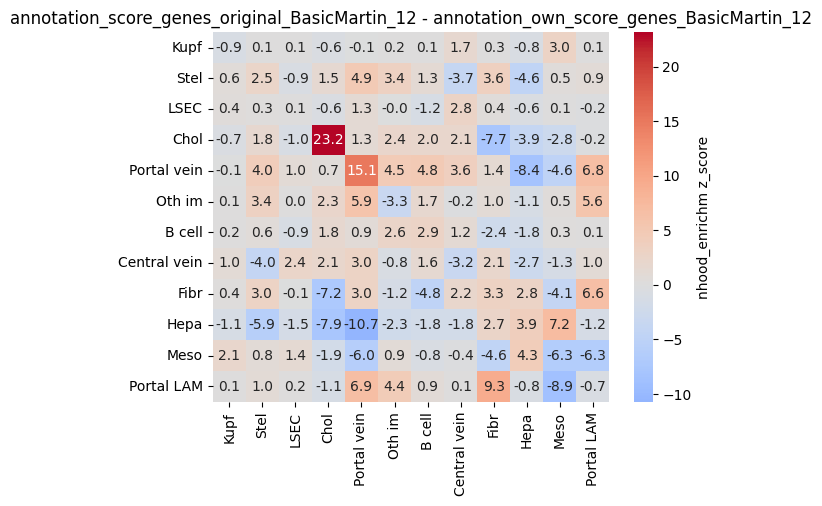

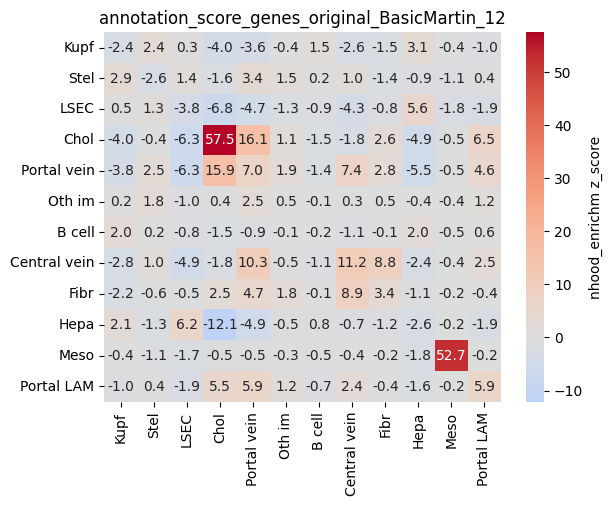

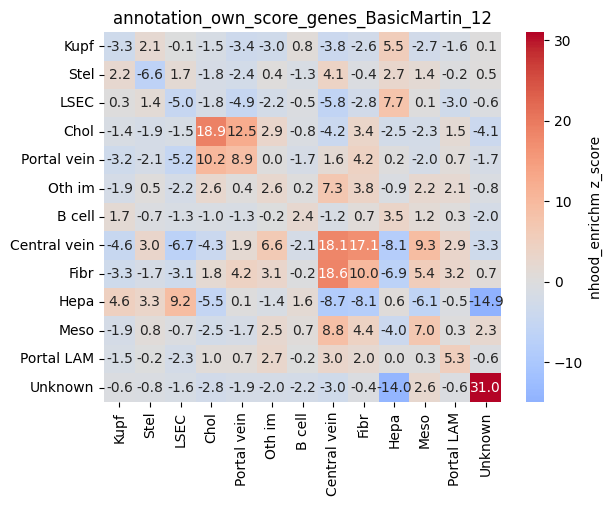

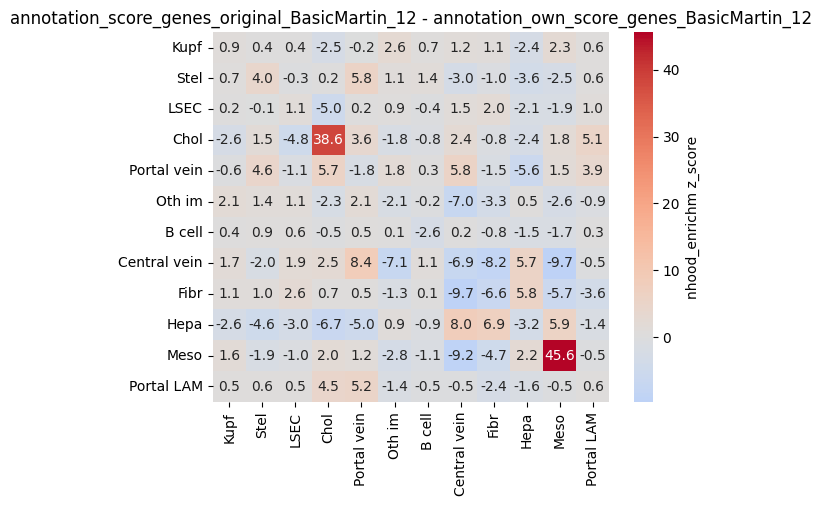

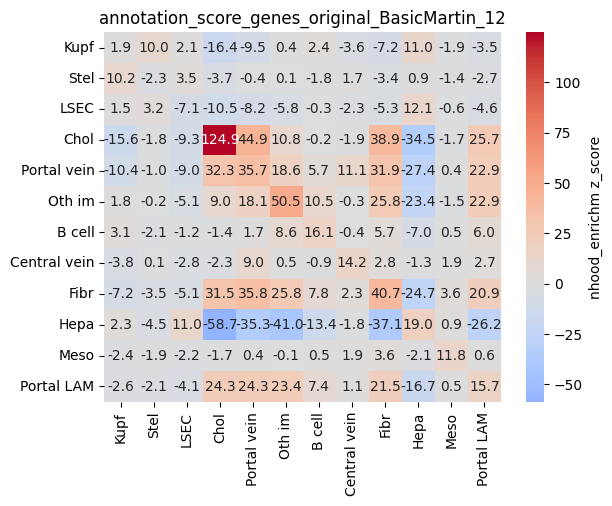

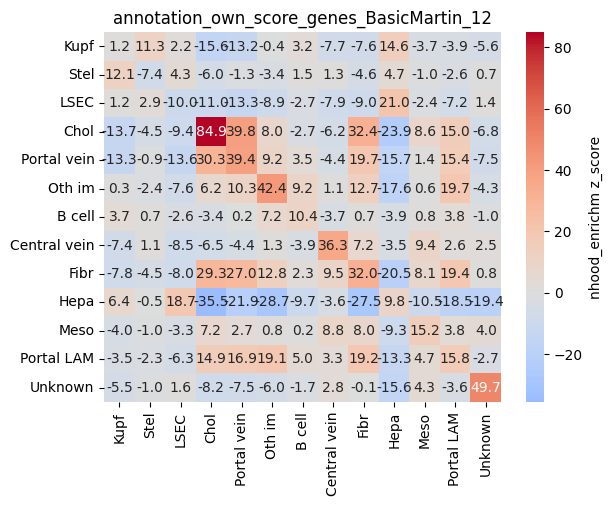

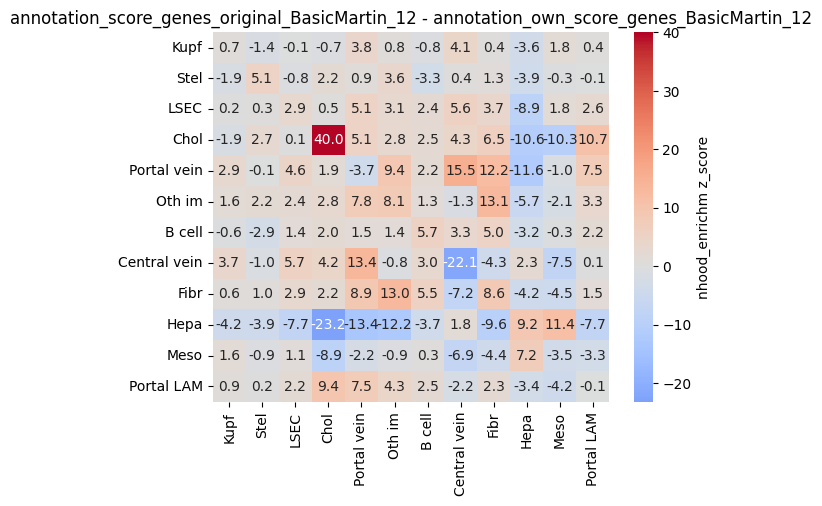

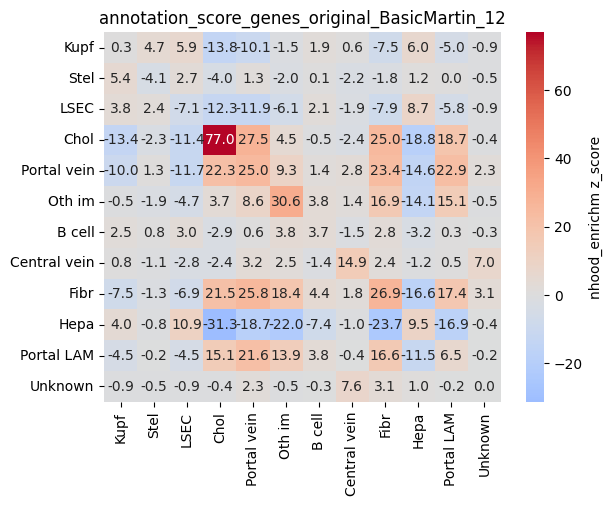

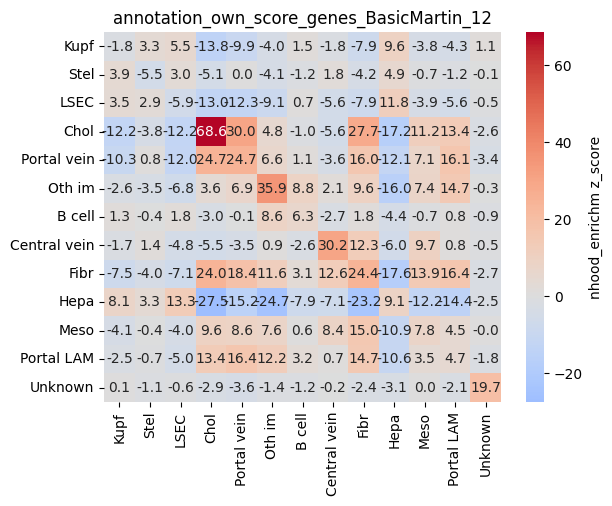

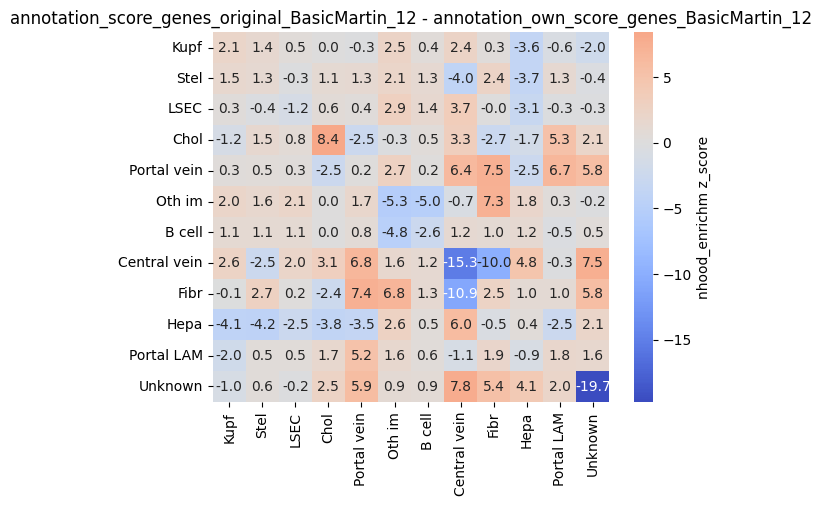

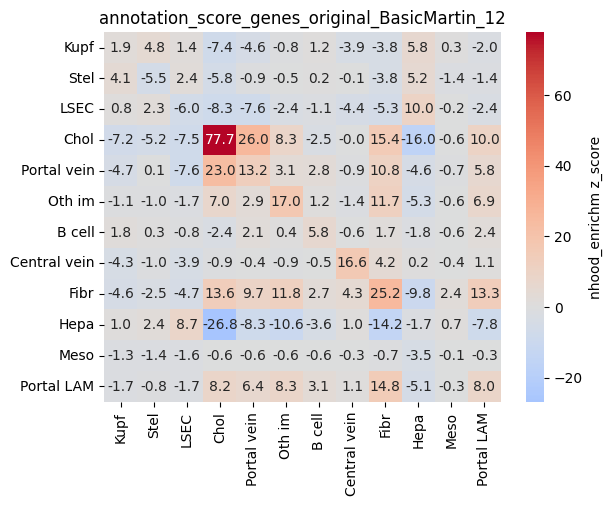

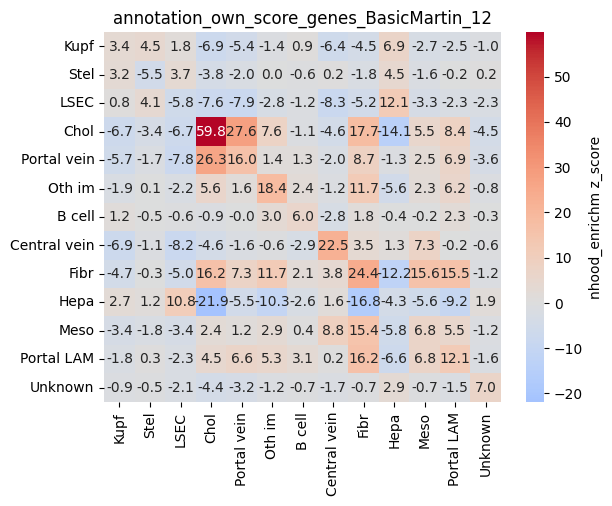

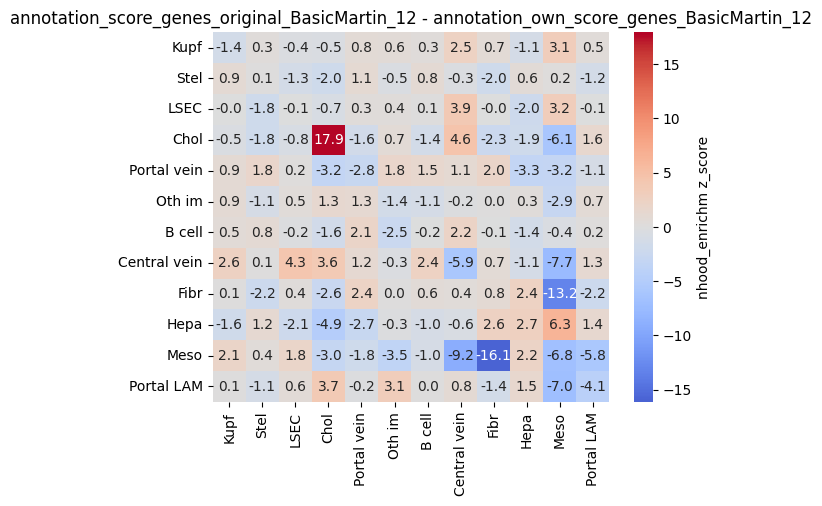

In [11]:
for i in range(len(anndata_objects)):
    print(samples[i])
    anno1_co_oc,anno2_co_oc,diff_co_oc = compare_co_occurrence(anndata_objects[i], annotation1, annotation2)
    anno1_co_ocs.append(anno1_co_oc)
    anno2_co_ocs.append(anno2_co_oc)
    diff_co_ocs.append(diff_co_oc)

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.0   4.9   2.8 -10.1         -7.2    -1.2     0.9   
Stel           5.2  -3.5   2.5  -3.3          1.5    -0.1    -0.1   
LSEC           2.2   2.4  -5.7  -9.7         -8.2    -3.9    -0.4   
Chol          -9.8  -2.1  -8.7  84.2         26.9     5.4    -1.2   
Portal vein   -7.5   1.1  -8.8  22.0         24.3     9.9     4.1   
Oth im        -0.6  -0.2  -3.3   4.5         10.5    23.6     5.4   
B cell         1.5  -0.3  -0.2  -2.1          1.1     4.8     8.9   
Central vein  -2.5  -0.2  -3.5  -1.8          4.5    -0.0    -1.0   
Fibr          -5.7  -1.0  -4.1  15.2         21.8    15.3     3.5   
Hepa           3.2  -1.2   9.2 -31.9        -20.2   -19.0    -7.4   
Portal LAM    -2.9  -0.5  -3.4  11.6         16.9    13.5     4.7   

              Central vein  Fibr  Hepa  Portal LAM  
Kupf                  -2.4  -5.3   6.6        -3.2  
Stel                   0.1  -1.6   1.3        -0.7  
LSEC                  -3.2  -4.6   9.0        -3.9  
Chol                  -1.5  18.2 -18.1        13.3  
Portal vein            4.3  18.4 -15.6        15.6  
Oth im                -0.2  15.2 -11.4        13.6  
B cell                -1.0   2.3  -4.0         3.6  
Central vein          15.1   3.5  -0.7         1.1  
Fibr                   3.3  25.8 -14.3        16.4  
Hepa                  -0.3 -20.9   7.9       -14.8  
Portal LAM             0.6  17.3 -10.1         9.6

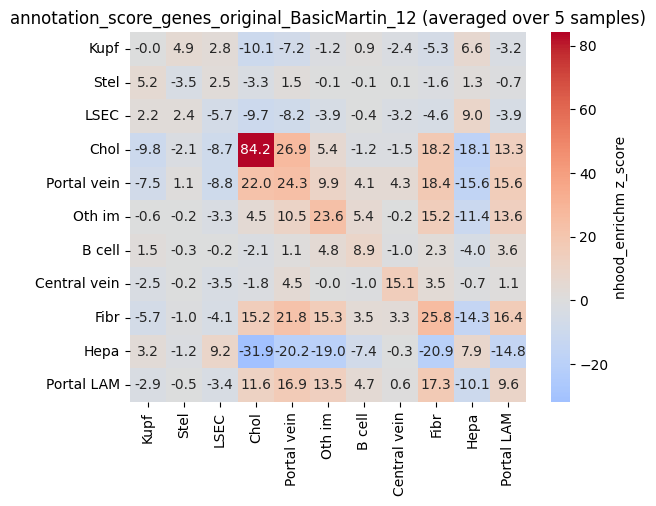

In [12]:
calculate_average_df(anno1_co_ocs,annotation1+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf          -0.3   4.7   2.7  -9.3         -8.1    -2.5     0.7   
Stel           4.8  -6.1   3.2  -4.0         -1.3    -2.0    -0.4   
LSEC           1.9   2.7  -6.2  -8.7         -9.6    -5.3    -0.9   
Chol          -8.4  -3.3  -7.6  58.5         25.7     4.7    -1.8   
Portal vein   -8.2  -1.1  -9.8  21.4         22.9     5.9     2.3   
Oth im        -1.9  -1.7  -4.5   3.7          6.7    24.4     6.1   
B cell         1.2  -0.4  -0.5  -2.4         -0.0     5.5     8.3   
Central vein  -4.8   1.6  -6.7  -4.9         -2.1     1.5    -2.9   
Fibr          -6.1  -2.1  -5.3  17.1         17.4    11.9     3.0   
Hepa           5.9   2.2  12.5 -22.7        -13.2   -16.7    -6.0   
Meso          -3.5  -0.9  -3.0   3.6          3.6     3.5     0.7   
Portal LAM    -2.8  -0.8  -4.2   7.9         12.0    11.1     4.0   
Unknown       -1.5  -1.1  -0.9  -4.4         -3.5    -2.6    -1.4   

              Central vein  Fibr  Hepa  Meso  Portal LAM  Unknown  
Kupf                  -4.7  -5.9   9.0  -3.5        -3.4     -1.0  
Stel                   2.2  -2.5   4.3  -0.8        -1.0     -0.1  
LSEC                  -6.7  -5.8  12.4  -2.4        -4.6     -0.6  
Chol                  -4.8  19.6 -14.0   5.0         8.8     -4.4  
Portal vein           -2.2  14.1  -9.4   3.0        10.9     -3.7  
Oth im                 1.7  11.6 -10.6   3.0        11.8     -1.7  
B cell                -2.6   1.7  -2.6   0.1         3.1     -0.9  
Central vein          25.8   7.5  -2.5   7.3         0.8     -0.6  
Fibr                   8.4  24.1 -15.8  11.1        15.7     -0.3  
Hepa                  -3.0 -21.3   5.3  -8.5       -12.5     -8.4  
Meso                   7.0  10.8  -7.6  10.7         4.8      1.0  
Portal LAM             1.2  15.4  -9.0   5.2        10.1     -1.4  
Unknown               -0.8  -0.5  -7.4   1.2        -1.8     28.0

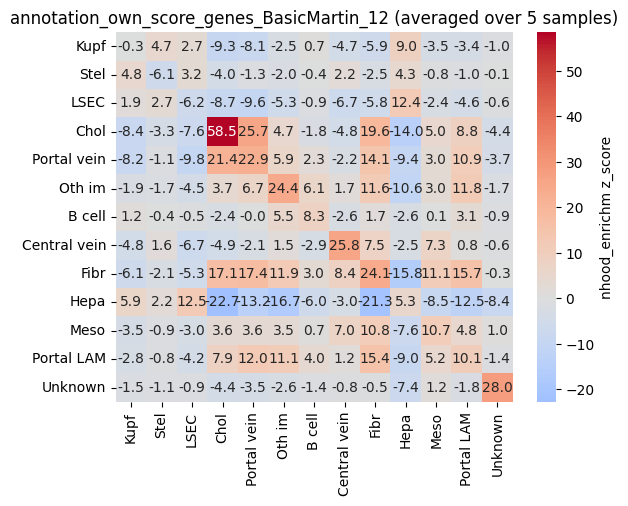

In [13]:
calculate_average_df(anno2_co_ocs,annotation2+' (averaged over 5 samples)')

Kupf  Stel  LSEC  Chol  Portal vein  Oth im  B cell  \
Kupf           0.3   0.2   0.1  -0.9          0.8     1.3     0.1   
Stel           0.4   2.6  -0.7   0.6          2.8     1.9     0.3   
LSEC           0.2  -0.3   0.6  -1.0          1.4     1.4     0.5   
Chol          -1.4   1.1  -1.1  25.6          1.2     0.7     0.6   
Portal vein    0.7   2.2   1.0   0.5          1.4     4.0     1.8   
Oth im         1.3   1.5   1.2   0.8          3.8    -0.8    -0.7   
B cell         0.3   0.1   0.4   0.3          1.1    -0.7     0.6   
Central vein   2.3  -1.9   3.3   3.1          6.6    -1.5     1.9   
Fibr           0.4   1.1   1.2  -1.9          4.4     3.5     0.5   
Hepa          -2.7  -3.5  -3.3  -9.3         -7.1    -2.2    -1.4   
Portal LAM    -0.1   0.3   0.8   3.6          4.9     2.4     0.7   

              Central vein  Fibr  Hepa  Portal LAM  
Kupf                   2.4   0.5  -2.3         0.2  
Stel                  -2.1   0.8  -3.0         0.3  
LSEC                   3.5   1.2  -3.3         0.6  
Chol                   3.3  -1.4  -4.1         4.5  
Portal vein            6.5   4.3  -6.3         4.8  
Oth im                -1.9   3.6  -0.8         1.8  
B cell                 1.6   0.5  -1.3         0.5  
Central vein         -10.7  -3.9   1.8         0.3  
Fibr                  -5.0   1.7   1.5         0.7  
Hepa                   2.7   0.4   2.6        -2.3  
Portal LAM            -0.6   1.9  -1.0        -0.5

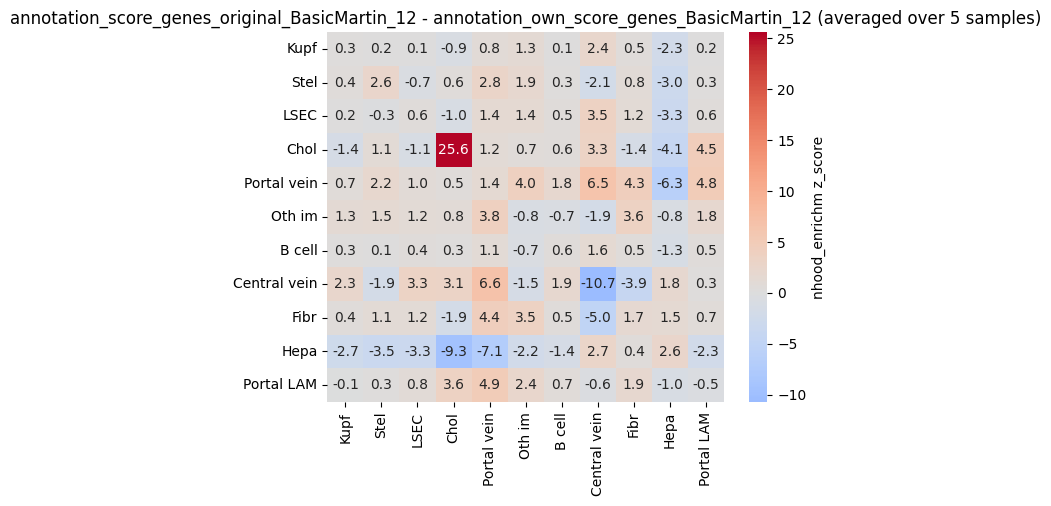

In [14]:
calculate_average_df(diff_co_ocs,annotation1 + ' - ' + annotation2 + ' (averaged over 5 samples)')